In [3]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

import seaborn as sns 

Многофакторный дисперсионный анализ

In [4]:
ads_clicks = pd.read_csv('C:/Users/spit/Desktop/math/5/class/5 ads_clicks.csv')

In [5]:
ads_clicks.head()

,id,ads,age_group,clicks
0,S001,classic,18-27,40
1,S002,classic,18-27,22
2,S003,classic,18-27,41
3,S004,classic,18-27,35
4,S005,classic,18-27,39


In [7]:
ads_clicks['ads'].unique()

array(['classic', 'bold'], dtype=object)

In [11]:
#через statsmodels, только главные эффекты

model_main = smf.ols("clicks ~ C(ads) + C (age_group)", data=ads_clicks).fit()
anova_lm(model_main)

,df,sum_sq,mean_sq,F,PR(>F)
C(ads),1.0,33735.001667,33735.001667,68.810244,7.245176e-16
C(age_group),2.0,400495.163333,200247.581667,408.450696,1.950084e-112
Residual,596.0,292195.753333,490.261331,NaN,NaN


<Axes: xlabel='ads', ylabel='clicks'>

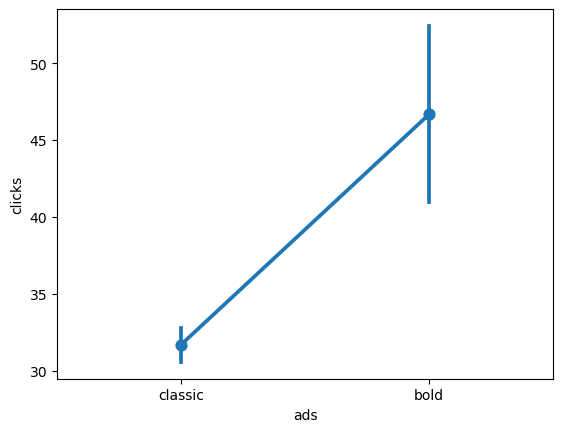

In [14]:
sns.pointplot(x='ads', y = 'clicks', data = ads_clicks)

<Axes: xlabel='age_group', ylabel='clicks'>

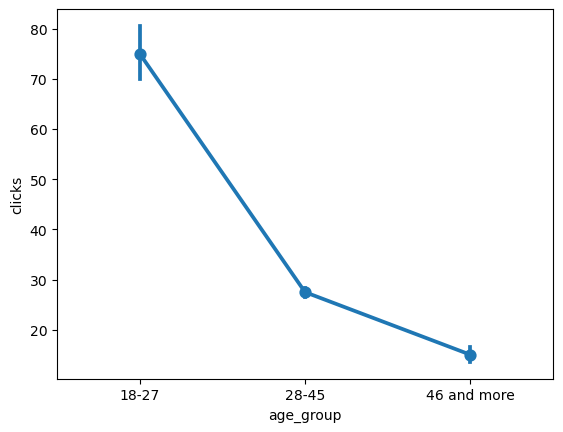

In [15]:
sns.pointplot(x='age_group', y = 'clicks', data = ads_clicks)

In [16]:
# взаимодействие

model_main = smf.ols("clicks ~ C(ads) + C(age_group) + C(ads):C(age_group)", data=ads_clicks).fit()
anova_lm(model_main)

,df,sum_sq,mean_sq,F,PR(>F)
C(ads),1.0,33735.001667,33735.001667,336.722432,6.446773e-60
C(age_group),2.0,400495.163333,200247.581667,1998.750536,1.636934e-264
C(ads):C(age_group),2.0,232685.043333,116342.521667,1161.260853,5.618312e-206
Residual,594.0,59510.710000,100.186380,NaN,NaN


<Axes: xlabel='ads', ylabel='clicks'>

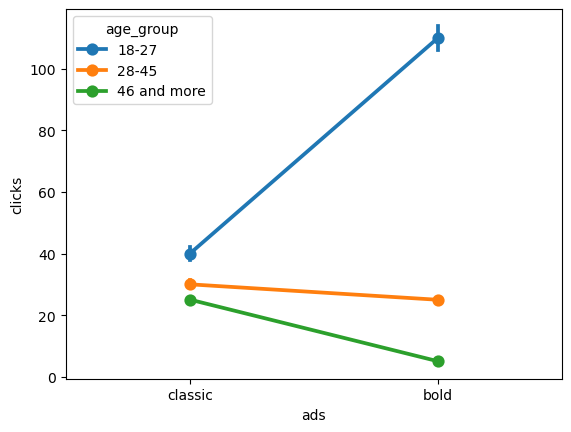

In [19]:
sns.pointplot(x='ads', y = 'clicks', hue='age_group', data = ads_clicks)

In [21]:
# туперь в  пингвини

pg.anova(data=ads_clicks, dv="clicks", between=["ads", "age_group"])

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.361786
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.870631
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.796333
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [22]:
#размер эффекта
pg.anova(data=ads_clicks, dv="clicks", between=["ads", "age_group"], effsize="n2")

,Source,SS,DF,MS,F,p-unc,n2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.046440
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.551323
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.320315
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [23]:
pg.anova(data=ads_clicks, dv="clicks", between=["ads", "age_group"], ss_type=1)

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.361786
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.870631
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.796333
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN
